1115202100100 ΜΗΛΑΣ ΙΩΑΝΝΗΣ

1115202100075 ΚΥΡΙΤΣΗΣ ΧΡΗΣΤΟΣ



In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!mkdir 'sample_data/data_files'
!mkdir 'sample_data/data_files/2019'
!mkdir 'sample_data/data_files/2023'

#DATA CLEANING 2019

In [3]:
import pandas as pd
import numpy as np

#get files to concat
column_names = ['id', 'zipcode', 'transit', 'bedrooms', 'beds', 'review_scores_rating', 'number_of_reviews', 'neighbourhood', 'name', 'latitude', 'longitude', 'last_review', 'instant_bookable', 'host_since', 'host_response_rate', 'host_identity_verified', 'host_has_profile_pic', 'first_review', 'description', 'city', 'cancellation_policy', 'bed_type', 'bathrooms', 'accommodates', 'amenities', 'room_type', 'property_type', 'price', 'availability_365', 'minimum_nights','host_id']
df = pd.read_csv('/content/drive/MyDrive/data/2019/april/listings.csv')
df = df[column_names]
df['month'] = 'April'
df.to_csv('sample_data/data_files/2019/april_2019.csv')

df = pd.read_csv('/content/drive/MyDrive/data/2019/febrouary/listings.csv')
df = df[column_names]
df['month'] = 'February'
df.to_csv('sample_data/data_files/2019/february_2019.csv')

df = pd.read_csv('/content/drive/MyDrive/data/2019/march/listings.csv')
df = df[column_names]
df['month'] = 'March'
df.to_csv('sample_data/data_files/2019/march_2019.csv')

#append into a list and concat into a single train_2019 file
li = []
df = pd.read_csv('sample_data/data_files/2019/april_2019.csv', index_col=None, header=0)
li.append(df)
df = pd.read_csv('sample_data/data_files/2019/february_2019.csv', index_col=None, header=0)
li.append(df)
df = pd.read_csv('sample_data/data_files/2019/march_2019.csv', index_col=None, header=0)
li.append(df)
frame = pd.concat(li, axis=0, ignore_index=True)
frame.to_csv('sample_data/data_files/2019/train_2019.csv')
df = pd.read_csv('sample_data/data_files/2019/train_2019.csv')




#remove NaNs so that we dont lose a big amount of data
df.dropna(subset=['zipcode','description','bedrooms','beds','neighbourhood','name','host_identity_verified','host_since','host_has_profile_pic','city','price'], inplace=True)

#remove extreme values
df = df[df['minimum_nights'] <= 365]
df = df[df['beds'] >0]
df = df[df['minimum_nights'] >0]
df = df[df['bedrooms'] >0]
df = df[df['bathrooms'] >0]

#convert price to float number from string
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)

#add default values to the NaNs left from the above operations
df['transit'].fillna("No information", inplace=True)
mean_rating = round(df['review_scores_rating'].mean())
df['review_scores_rating'].fillna(int(mean_rating), inplace=True)
df['review_scores_rating'] = df['review_scores_rating'].astype(int)
df['host_response_rate'] = df['host_response_rate'].str.rstrip('%')
df['host_response_rate'] = df['host_response_rate'].apply(lambda x: int(x) if pd.notna(x) else x)
mean_response_rate = round(df['host_response_rate'].mean())
mean_response_rate_str = f"{int(mean_response_rate)}%"
df['host_response_rate'].fillna(mean_response_rate_str, inplace=True)
df['first_review'].fillna("Unknown", inplace=True)
df['last_review'].fillna("Unknown", inplace=True)
df.to_csv('sample_data/data_files/2019/train_2019.csv', index=False)







<ipython-input-3-acaf5a7de596>:6: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/data/2019/april/listings.csv')
<ipython-input-3-acaf5a7de596>:11: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/data/2019/febrouary/listings.csv')
<ipython-input-3-acaf5a7de596>:16: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/data/2019/march/listings.csv')


#DATA CLEANING 2023

In [4]:
import pandas as pd
import numpy as np
import re

#function to extract float number from bathrooms_text column
def extract_float(text):
    match = re.search(r'(\d+\.\d+|\d+)', text)
    if match:
        return float(match.group())
    else:
        return 0


#get files to concat
column_names = [ 'id', 'bedrooms', 'beds', 'review_scores_rating', 'number_of_reviews', 'name', 'latitude', 'longitude', 'last_review', 'instant_bookable', 'host_since', 'host_response_rate', 'host_identity_verified', 'host_has_profile_pic', 'first_review', 'description', 'accommodates', 'amenities', 'room_type', 'property_type', 'price', 'availability_365', 'minimum_nights', 'bathrooms_text', 'neighbourhood_cleansed','host_id']
df = pd.read_csv('/content/drive/MyDrive/data/2023/june/listings.csv')
df = df[column_names]
df['month'] = 'June'
df.to_csv('sample_data/data_files/2023/june_2023.csv')

df = pd.read_csv('/content/drive/MyDrive/data/2023/march/listings.csv')
df = df[column_names]
df['month'] = 'March'
df.to_csv('sample_data/data_files/2023/march_2023.csv')

df = pd.read_csv('/content/drive/MyDrive/data/2023/september/listings.csv')
df = df[column_names]
df['month'] = 'September'
df.to_csv('sample_data/data_files/2023/september_2023.csv')

#append into a list and concat into a single train_2019 file
li = []
df = pd.read_csv('sample_data/data_files/2023/june_2023.csv', index_col=None, header=0)
li.append(df)
df = pd.read_csv('sample_data/data_files/2023/march_2023.csv', index_col=None, header=0)
li.append(df)
df = pd.read_csv('sample_data/data_files/2023/september_2023.csv', index_col=None, header=0)
li.append(df)
frame = pd.concat(li, axis=0, ignore_index=True)
frame.to_csv('sample_data/data_files/2023/train_2023.csv')
df = pd.read_csv('sample_data/data_files/2023/train_2023.csv')

#remove NaNs
df.dropna(subset=['description','bedrooms','beds','name','host_identity_verified','host_since','host_has_profile_pic','price','bathrooms_text'], inplace=True)

#filter extreme values
df = df[df['minimum_nights'] <= 365]
df = df[df['beds'] >0]
df = df[df['minimum_nights'] >0]
df = df[df['bedrooms'] >0]

#convert price to float
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)

#replace leftover NaNs with default values
mean_rating = round(df['review_scores_rating'].mean())
df['review_scores_rating'].fillna(int(mean_rating), inplace=True)
df['review_scores_rating'] = df['review_scores_rating'].astype(int)
df['host_response_rate'] = df['host_response_rate'].str.rstrip('%')
df['host_response_rate'] = df['host_response_rate'].apply(lambda x: int(x) if pd.notna(x) else x)
mean_response_rate = round(df['host_response_rate'].mean())
mean_response_rate_str = f"{int(mean_response_rate)}%"
df['host_response_rate'].fillna(mean_response_rate_str, inplace=True)
df['first_review'].fillna("Unknown", inplace=True)
df['last_review'].fillna("Unknown", inplace=True)

#use bathrooms_text column for bathroom data and extract the float number from the strings it contains
df['bathrooms_text'] = df['bathrooms_text'].apply(extract_float)
df = df[df['bathrooms_text'] >0]
df.to_csv('sample_data/data_files/2023/train_2023.csv', index=False)


#1.1

In [5]:
#get the df of the requested file and based on the room_type column find the one which appears most
df = pd.read_csv('sample_data/data_files/2019/train_2019.csv')
most_common = df['room_type'].value_counts().idxmax()
print("The most common room type for 2019 is:", most_common)

#get the df of the requested file and based on the room_type column find the one which appears most
df = pd.read_csv('sample_data/data_files/2023/train_2023.csv')
most_common = df['room_type'].value_counts().idxmax()
print("The most common room type for 2023 is:", most_common)

The most common room type for 2019 is: Entire home/apt
The most common room type for 2023 is: Entire home/apt


#1.2

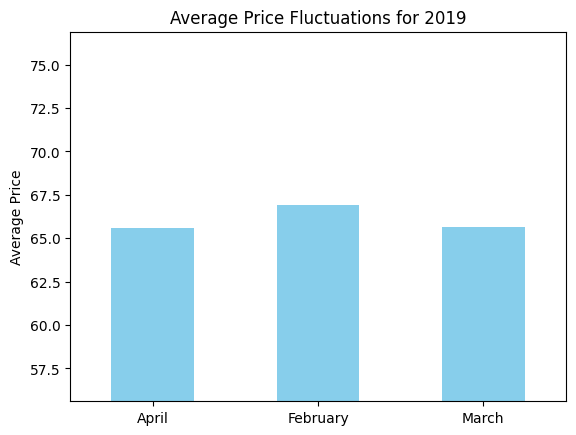

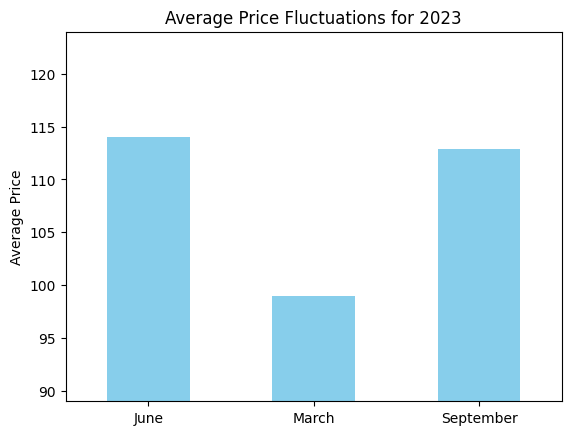

In [6]:
import matplotlib.pyplot as plt

#get the average prices grouped by month and add them to a diagram to show fluctuations between months for 2019
df = pd.read_csv('sample_data/data_files/2019/train_2019.csv')
df['price'] = df['price'].astype(int)
avg_price = df.groupby('month')['price'].mean()
avg_price.plot(kind='bar', color='skyblue')
plt.title('Average Price Fluctuations for 2019')
plt.xlabel('')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.ylim(min(avg_price) - 10, max(avg_price) + 10)
plt.show()


#get the average prices grouped by month and add them to a diagram to show fluctuations between months for 2023
df = pd.read_csv('sample_data/data_files/2023/train_2023.csv')
df['price'] = df['price'].astype(int)
avg_price = df.groupby('month')['price'].mean()
avg_price.plot(kind='bar', color='skyblue')
plt.title('Average Price Fluctuations for 2023')
plt.xlabel('')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.ylim(min(avg_price) - 10, max(avg_price) + 10)
plt.show()

#1.3

In [7]:
#get the total number of reviews grouped by neighbourhood for 2019
df = pd.read_csv('sample_data/data_files/2019/train_2019.csv')
reviews = df.groupby('neighbourhood')['number_of_reviews'].sum()
top = reviews.sort_values(ascending=False)
top_5 = top.head(5)
print("Top 5 neighborhoods with the most reviews for 2019:")
print(top_5)




#get the total number of reviews grouped by neighbourhood for 2023 (use neighbourhood_cleansed)
df = pd.read_csv('sample_data/data_files/2023/train_2023.csv')
reviews = df.groupby('neighbourhood_cleansed')['number_of_reviews'].sum()
top = reviews.sort_values(ascending=False)
top_5 = top.head(5)
print("Top 5 neighborhoods with the most reviews for 2023:")
print(top_5)

Top 5 neighborhoods with the most reviews for 2019:
neighbourhood
Plaka          117972
Koukaki         82598
Neos Kosmos     75186
Psyri           42280
Larissis        37680
Name: number_of_reviews, dtype: int64
Top 5 neighborhoods with the most reviews for 2023:
neighbourhood_cleansed
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ              364866
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                 186226
ΝΕΟΣ ΚΟΣΜΟΣ                         112580
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ     92765
ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ             90664
Name: number_of_reviews, dtype: int64


#1.4


In [22]:
#get the count of homes for each neighbourhood and find the maximum for 2019
df = pd.read_csv('sample_data/data_files/2019/train_2019.csv')
counts = df['neighbourhood'].value_counts()
top_neigh = counts.idxmax()
print("Neighborhood with the most homes for 2019:", top_neigh)



#get the count of homes for each neighbourhood and find the maximum for 2023 (use neighbourhood_cleansed)
df = pd.read_csv('sample_data/data_files/2023/train_2023.csv')
counts = df['neighbourhood_cleansed'].value_counts()
top_neigh = counts.idxmax()
print("Neighborhood with the most homes for 2023:", top_neigh)

Neighborhood with the most homes for 2019: Plaka
Neighborhood with the most homes for 2023: ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ


#1.5

In [9]:
#get the count of homes grouped by neighborhood and month and then convert to string for printing for 2019
df = pd.read_csv('sample_data/data_files/2019/train_2019.csv')
counts = df.groupby(['neighbourhood', 'month']).size().reset_index(name='count')
counts_str = counts.to_string(index=False)
print("Number of homes for each neighbourhood and month:")
print(counts_str)



#get the count of homes grouped by neighborhood and month and then convert to string for printing for 2023 (use neighbourhood_cleansed)
df = pd.read_csv('sample_data/data_files/2023/train_2023.csv')
counts = df.groupby(['neighbourhood_cleansed', 'month']).size().reset_index(name='count')
counts_str = counts.to_string(index=False)
print("Number of homes for each neighbourhood and month:")
print(counts_str)

Number of homes for each neighbourhood and month:
    neighbourhood    month  count
     Agios Loukas    April     54
     Agios Loukas February     54
     Agios Loukas    March     55
   Agios Nikolaos    April    187
   Agios Nikolaos February    175
   Agios Nikolaos    March    186
Akadimia Platonos    April     38
Akadimia Platonos February     18
Akadimia Platonos    March     36
       Ambelokipi    April    467
       Ambelokipi February    427
       Ambelokipi    March    461
           Attiki    April    243
           Attiki February    213
           Attiki    March    231
        Exarcheia    April    421
        Exarcheia February    334
        Exarcheia    March    408
             Gazi    April     55
             Gazi February    148
             Gazi    March     50
            Goudi    April     29
            Goudi February     25
            Goudi    March     28
           Ilisia    April    160
           Ilisia February    140
           Ilisia    March    15

#1.6


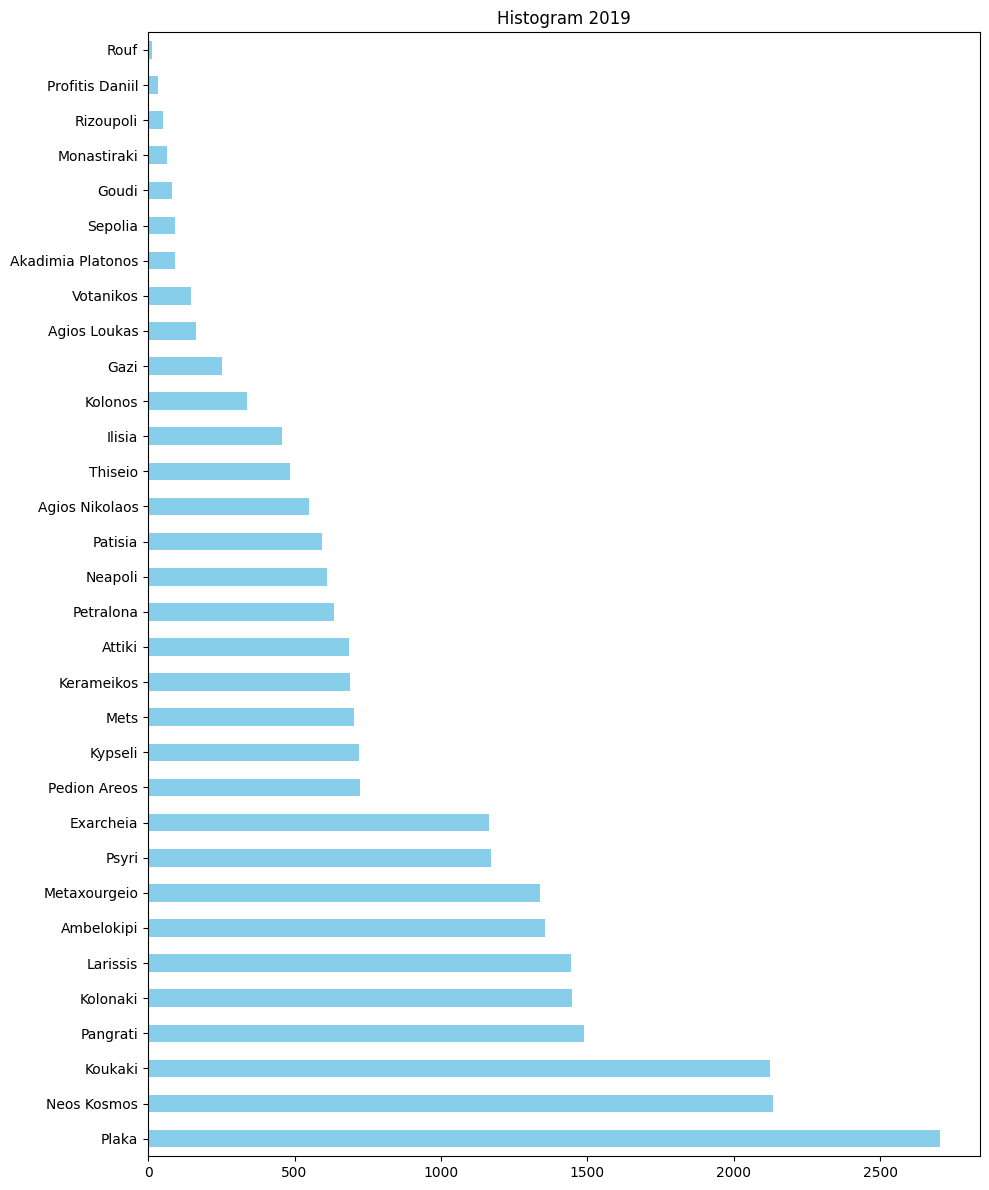

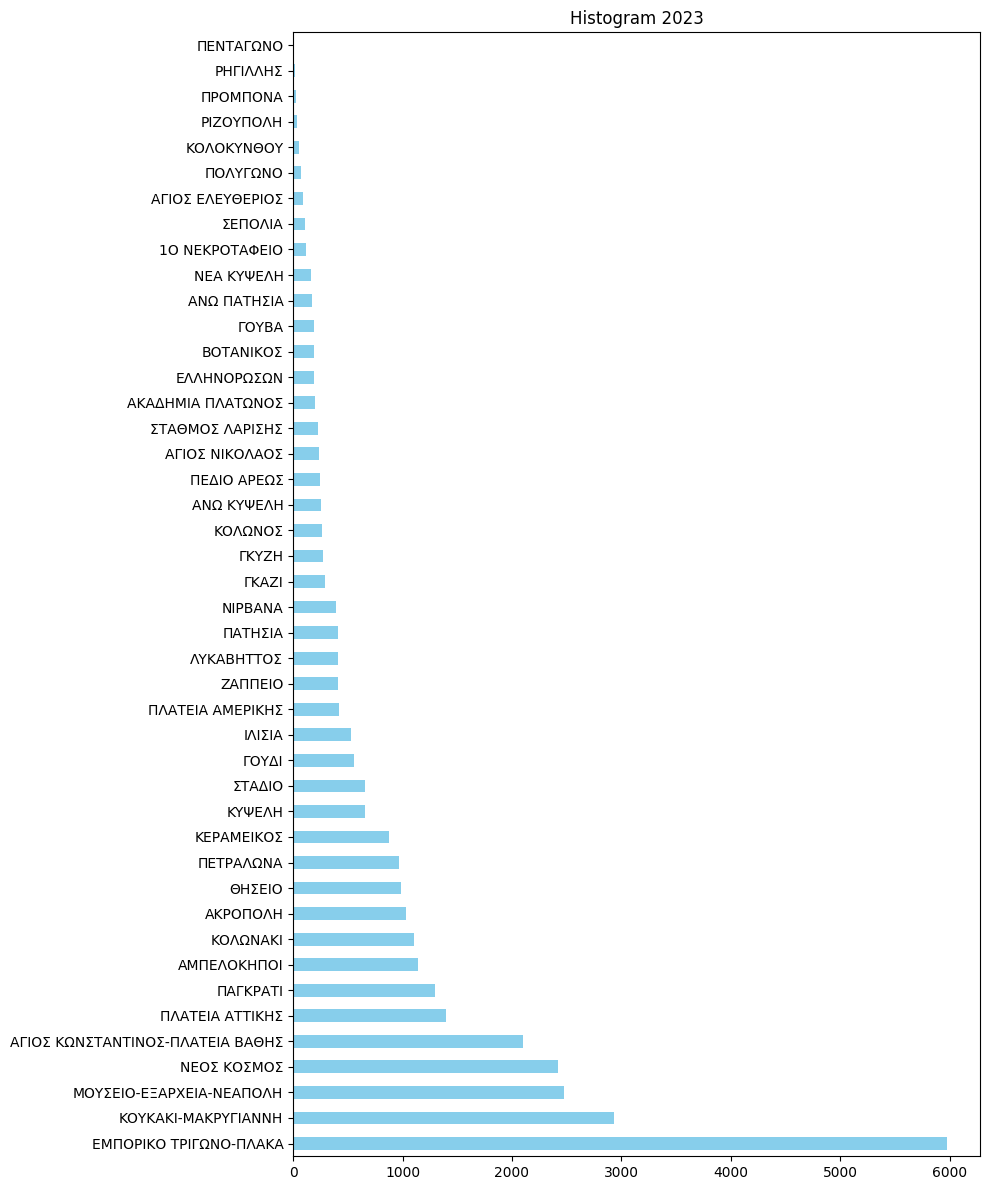

In [10]:
import matplotlib.pyplot as plt

#get the count of homes for each neighborhood and plot to create histogram for 2019
df = pd.read_csv('sample_data/data_files/2019/train_2019.csv')
counts = df['neighbourhood'].value_counts()
plt.figure(figsize=(10, 12))
counts.plot(kind='barh', color='skyblue')
plt.title('Histogram 2019')
plt.ylabel('')
plt.xlabel('')
plt.tight_layout()
plt.show()





#get the count of homes for each neighborhood and plot to create histogram for 2023 (use neighbourhood_cleansed)
df = pd.read_csv('sample_data/data_files/2023/train_2023.csv')
counts = df['neighbourhood_cleansed'].value_counts()
plt.figure(figsize=(10, 12))
counts.plot(kind='barh', color='skyblue')
plt.title('Histogram 2023')
plt.ylabel('')
plt.xlabel('')
plt.tight_layout()
plt.show()

#1.7

In [20]:
#get the count of rooms grouped by neighborhood and room_type and select the maxumum to find the most common room type for 2019
df = pd.read_csv('sample_data/data_files/2019/train_2019.csv')
room_type_counts = df.groupby(['neighbourhood', 'room_type']).size()
most_common_room_types = room_type_counts.groupby(level=0).idxmax().apply(lambda x: x[1])
print("Most common room type in each neighborhood for 2019:")
print(most_common_room_types)




#get the count of rooms grouped by neighborhood and room_type and select the maxumum to find the most common room type for 2023 (use neighbourhood_cleansed)
df = pd.read_csv('sample_data/data_files/2023/train_2023.csv')
room_type_counts = df.groupby(['neighbourhood_cleansed', 'room_type']).size()
most_common_room_types = room_type_counts.groupby(level=0).idxmax().apply(lambda x: x[1])
print("Most common room type in each neighborhood for 2023:")
print(most_common_room_types)

Most common room type in each neighborhood for 2019:
neighbourhood
Agios Loukas         Entire home/apt
Agios Nikolaos       Entire home/apt
Akadimia Platonos    Entire home/apt
Ambelokipi           Entire home/apt
Attiki               Entire home/apt
Exarcheia            Entire home/apt
Gazi                 Entire home/apt
Goudi                Entire home/apt
Ilisia               Entire home/apt
Kerameikos           Entire home/apt
Kolonaki             Entire home/apt
Kolonos              Entire home/apt
Koukaki              Entire home/apt
Kypseli              Entire home/apt
Larissis             Entire home/apt
Metaxourgeio         Entire home/apt
Mets                 Entire home/apt
Monastiraki          Entire home/apt
Neapoli              Entire home/apt
Neos Kosmos          Entire home/apt
Pangrati             Entire home/apt
Patisia              Entire home/apt
Pedion Areos         Entire home/apt
Petralona            Entire home/apt
Plaka                Entire home/apt
Profitis

#1.8

In [12]:
#get the average prices grouped by room type and select the most expensive one for 2019
df = pd.read_csv('sample_data/data_files/2019/train_2019.csv')
avg_prices = df.groupby('room_type')['price'].mean()
most_expensive_room_type = avg_prices.idxmax()
max = avg_prices.max()
print("Most expensive room type for 2019:", most_expensive_room_type)
print("Average price:", max)




#get the average prices grouped by room type and select the most expensive one for 2023
df = pd.read_csv('sample_data/data_files/2023/train_2023.csv')
avg_prices = df.groupby('room_type')['price'].mean()
most_expensive_room_type = avg_prices.idxmax()
max = avg_prices.max()
print("Most expensive room type for 2023:", most_expensive_room_type)
print("Average price:", max)

Most expensive room type for 2019: Private room
Average price: 82.22001419446416
Most expensive room type for 2023: Hotel room
Average price: 267.7142857142857


#1.9

In [13]:
import folium

#using the folium library and the location of each room (latitude,longitude) place them into a map while also adding labels showing room_type,price,bef_type and transit information for 2019(selected month April)
df = pd.read_csv('sample_data/data_files/2019/train_2019.csv')
selected_month = 'April'
selected_month_data = df[df['month'] == selected_month]
m = folium.Map(location=[selected_month_data['latitude'].mean(), selected_month_data['longitude'].mean()], zoom_start=12)
for index, row in selected_month_data.iterrows():
    popup_text = f"Room Type: {row['room_type']}<br>Price: ${row['price']} per night<br>Bed Type: {row['bed_type']}<br>Transit: {row['transit']}"
    folium.Marker([row['latitude'], row['longitude']], popup=popup_text).add_to(m)
m

Output hidden; open in https://colab.research.google.com to view.

#1.10

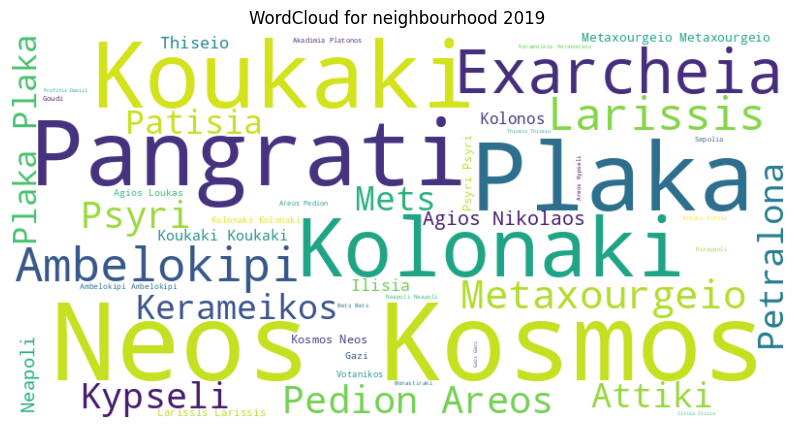

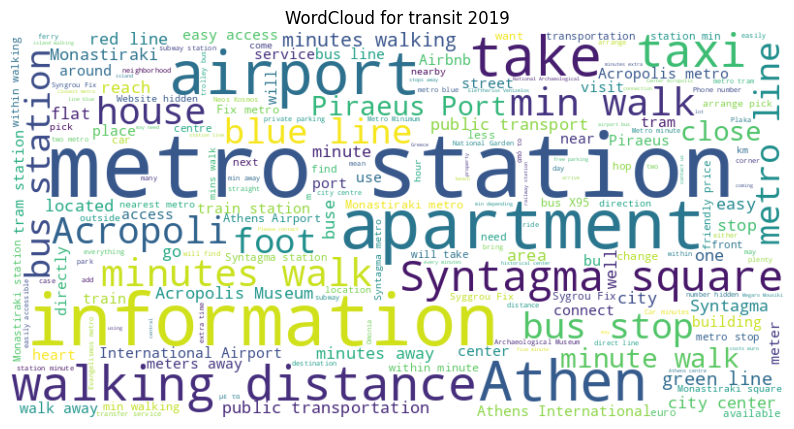

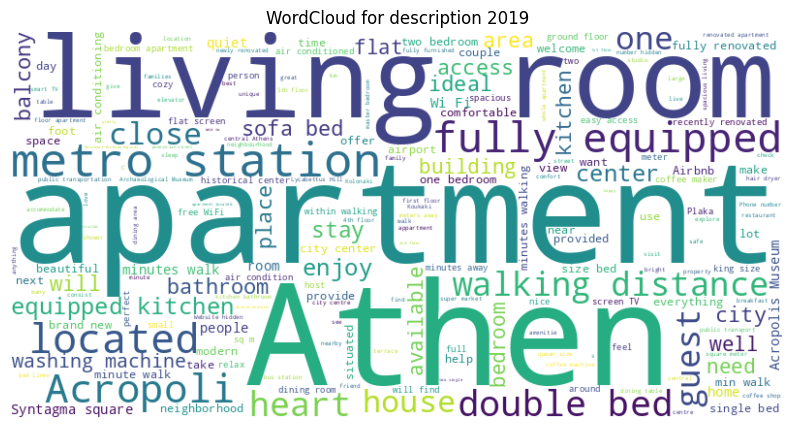

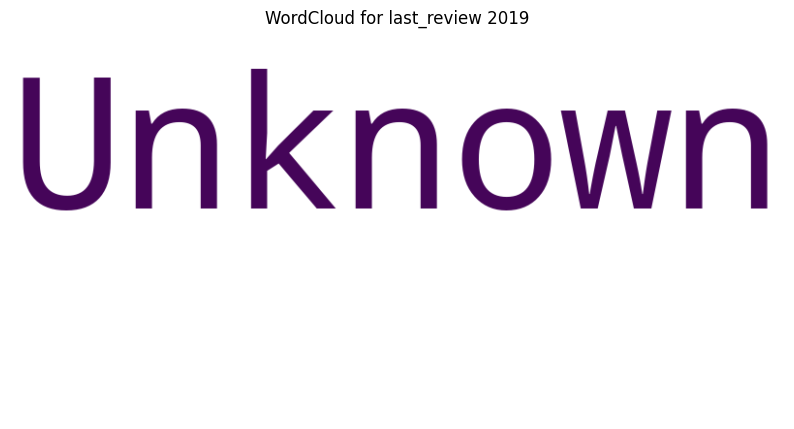

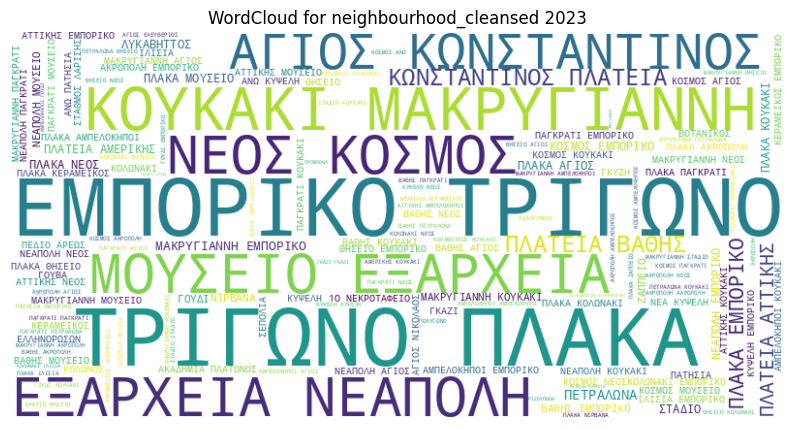

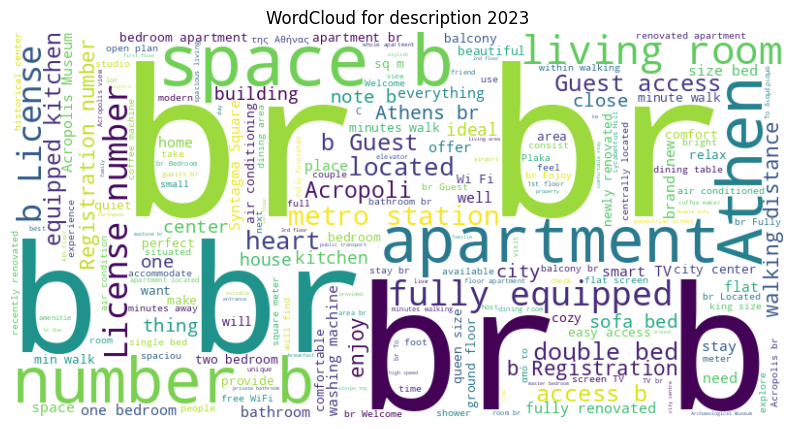

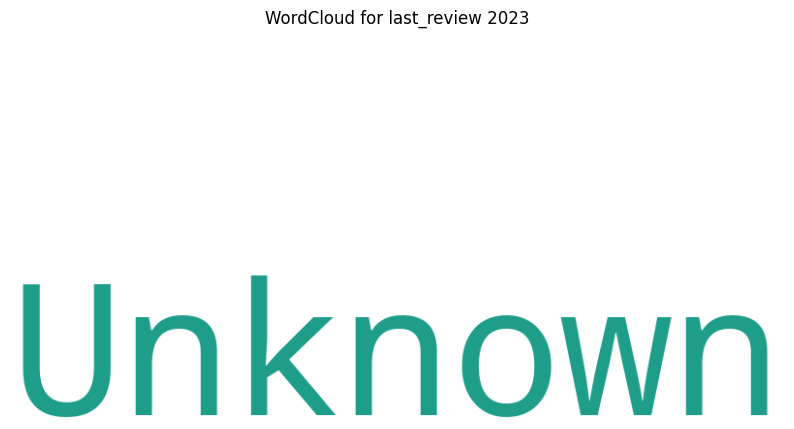

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


df = pd.read_csv('sample_data/data_files/2019/train_2019.csv')
#Defining the columns that will be used for the word clouds
columns = ['neighbourhood', 'transit', 'description', 'last_review']
#Iterating through each column, combining all not-NaN values and showing the word cloud for 2019
for column in columns:
    text = ' '.join(df[column].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color ='white', stopwords = None).generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'WordCloud for {column} 2019')
    plt.axis('off')
    plt.show()




df = pd.read_csv('sample_data/data_files/2023/train_2023.csv')
#Defining the columns that will be used for the word clouds using neighbourhood_cleansed
columns = ['neighbourhood_cleansed', 'description', 'last_review']
#Iterating through each column, combining all not-NaN values and showing the word cloud for 2023
for column in columns:
    text = ' '.join(df[column].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color ='white', stopwords = None).generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'WordCloud for {column} 2023')
    plt.axis('off')
    plt.show()


#1.11

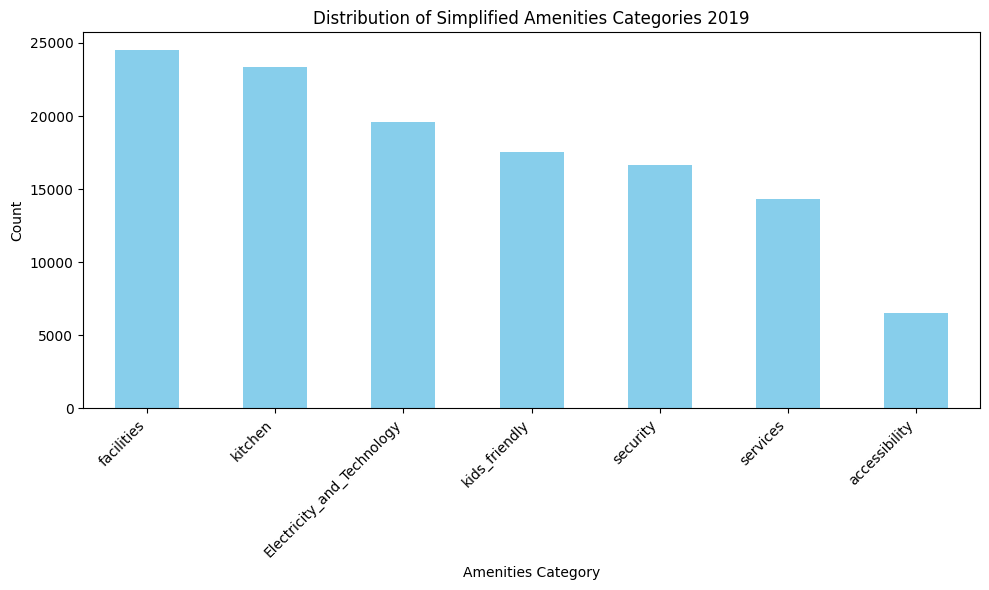

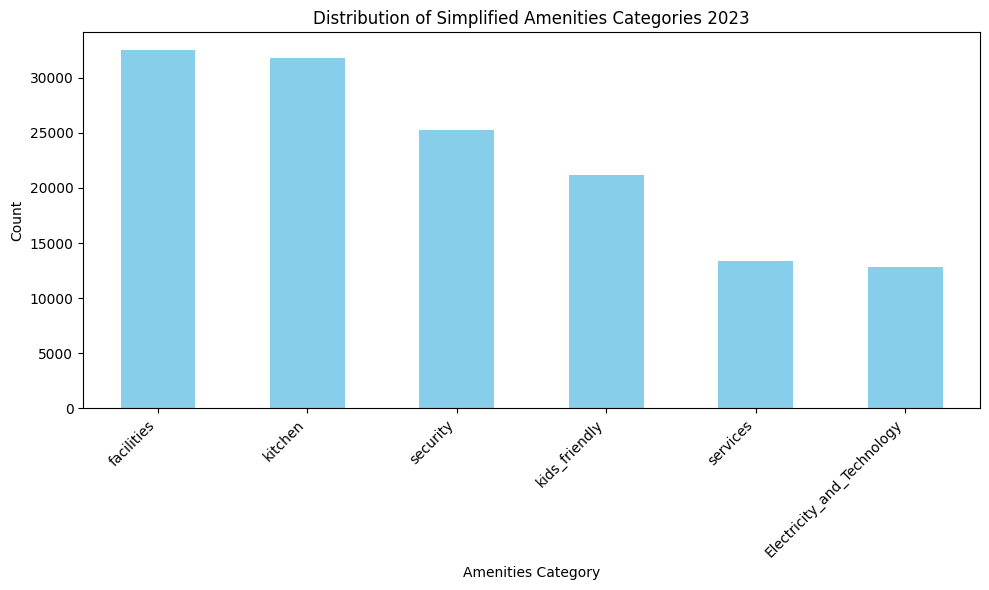

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('sample_data/data_files/2019/train_2019.csv')

# Define the categories mapping
categories = [
    ('kitchen', ['Kitchen', 'Mini fridge', 'Double oven', 'Microwave', 'Coffee maker', 'Refrigerator', 'Dishwasher', 'Dishes and silverware',
                 'Cooking basics', 'Oven', 'Stove', 'BBQ grill', 'Convection oven', 'Espresso machine', 'Formal dining area', 'Gas oven',
                 'Full kitchen', 'Wine cooler', 'Steam oven']),
    ('accessibility', ['Walk-in shower', 'Wheelchair accessible', 'Wide entryway', 'Accessible-height toilet', 'Roll-in shower',
                      'Step-free access', 'Accessible-height bed', 'Disabled parking spot', 'Fixed grab bars for toilet', 'Wide clearance to bed',
                      'Wide hallway clearance', 'Disabled parking spot', 'Fixed grab bars for shower', 'Stair gates', 'Shower chair']),
    ('Electricity_and_Technology', ['Smart lock', 'Amazon Echo', 'Laptop friendly workspace', 'HBO GO', 'Projector and screen',
                                    'Netflix', 'Smart TV', 'DVD player', 'Ethernet connection', '24-hour check-in', 'Internet', 'Keypad','Dryer', 'Washer / Dryer']),
    ('facilities', ['Outdoor parking', 'Paid parking off premises', 'Indoor fireplace', 'Printer', 'Hot tub',
                     'Smart lock', 'Bath towel', 'First aid kit', 'Cable TV', 'Ceiling fan', 'Hair dryer', 'Private hot tub',
                    'Shared gym', 'Soaking tub', 'Gym', 'Sauna', 'Heating', 'Bathtub', 'Beach view', 'Ironing Board',
                    'Jetted tub', 'Private pool', 'Air purifier', 'Murphy bed', 'Air conditioning', 'Heated floors', 'Sauna', 'Family/kid friendly',
                    'Free parking on premises', 'Smoking allowed', 'Game console', 'Lock on bedroom door', 'Pool', 'Sun loungers', 'Fire pit',
                    'Garden or backyard', 'Fireplace guards', 'Central air conditioning', 'Cleaning before checkout',
                    'Mountain view', 'Wifi', 'Private living room', 'Building staff', 'Day bed']),
    ('kids_friendly', ['Family/kid friendly', 'Children’s books and toys', 'High-resolution computer monitor',
                       'Long term stays allowed', 'Crib', 'Children’s dinnerware', 'Babysitter recommendations', 'High chair',
                       'Baby monitor', 'Baby bath', 'Pack ’n Play/travel crib']),
    ('security', ['Doorman', 'Smoke detector', 'Fire extinguisher', 'Safety card', 'Window guards', 'Lockbox', 'First aid kit']),
    ('services', ['Luggage dropoff allowed', 'Suitable for events', 'EV charger', '24-hour check-in', 'Host greets you', 'Cleaning before checkout'])
]

#function to simplify amenities and count category occurrences
def simplify_amenities(amenities):
    simplified_amenities = []
    for category, items in categories:
        if any(item in amenities for item in items):
            simplified_amenities.append(category)
    return simplified_amenities

#Applying the function to each row in the amenities column
df['amenities'] = df['amenities'].apply(simplify_amenities)

category_counts = df['amenities'].explode().value_counts()

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Simplified Amenities Categories 2019')
plt.xlabel('Amenities Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




df = pd.read_csv('sample_data/data_files/2023/train_2023.csv')

#function to simplify amenities and count category occurrences
def simplify_amenities(amenities):
    simplified_amenities = []
    for category, items in categories:
        if any(item in amenities for item in items):
            simplified_amenities.append(category)
    return simplified_amenities

#Applying the function to each row in the amenities column
df['amenities'] = df['amenities'].apply(simplify_amenities)

category_counts = df['amenities'].explode().value_counts()

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Simplified Amenities Categories 2023')
plt.xlabel('Amenities Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#1.12

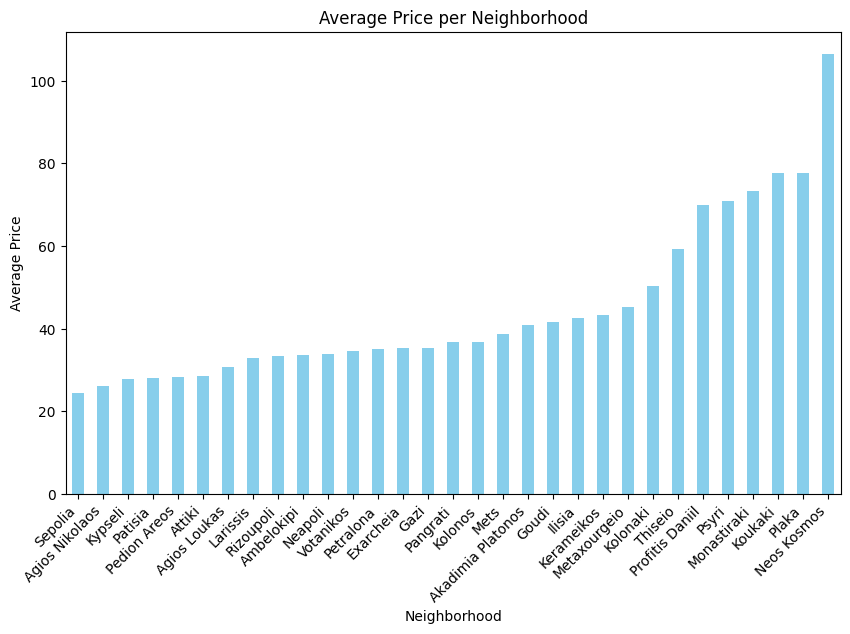

price
Budget       24
Average       6
Expensive     1
Name: price, dtype: int64


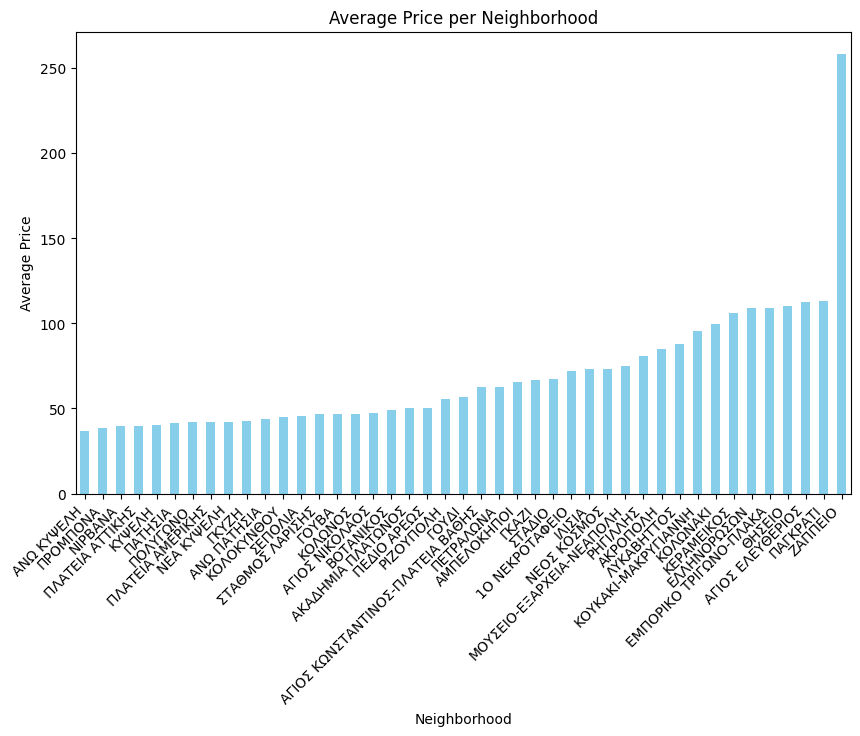

price
Budget       40
Average       2
Expensive     1
Name: price, dtype: int64


In [16]:
import matplotlib.pyplot as plt

df = pd.read_csv('sample_data/data_files/2019/train_2019.csv')
#Filtering the dataframe to include only rooms that accommodate two people
df = df[df['accommodates'] == 2]
#Average price per neighbourhood using neighbourhood_cleansed
neighborhood_avg_price = df.groupby('neighbourhood')['price'].mean().sort_values()
plt.figure(figsize=(10, 6))
neighborhood_avg_price.plot(kind='bar', color='skyblue')
plt.title('Average Price per Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.show()
#Categorizing neighbourhoods based on their prices
price_bins = pd.cut(neighborhood_avg_price, bins=3, labels=['Budget', 'Average', 'Expensive'])
neighborhoods_grouped = price_bins.groupby(price_bins).count()
print(neighborhoods_grouped)





df = pd.read_csv('sample_data/data_files/2023/train_2023.csv')
#Filtering the dataframe to include only rooms that accommodate two people
df = df[df['accommodates'] == 2]
#Average price per neighbourhood using neighbourhood_cleansed
neighborhood_avg_price = df.groupby('neighbourhood_cleansed')['price'].mean().sort_values()
plt.figure(figsize=(10, 6))
neighborhood_avg_price.plot(kind='bar', color='skyblue')
plt.title('Average Price per Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.show()
#Categorizing neighbourhoods based on their prices
price_bins = pd.cut(neighborhood_avg_price, bins=3, labels=['Budget', 'Average', 'Expensive'])
neighborhoods_grouped = price_bins.groupby(price_bins).count()
print(neighborhoods_grouped)

#1.13


In [17]:
#find the average price of the hotels sorted by neighborhoods for 2019
df = pd.read_csv('sample_data/data_files/2019/train_2019.csv')
average_price_by_neighborhood = df.groupby('neighbourhood')['price'].mean().reset_index()
average_price_by_neighborhood_sorted = average_price_by_neighborhood.sort_values(by='price', ascending=False)
print(average_price_by_neighborhood_sorted)




#find the name of the hotel that is instant bookable, has a price lower than $75 and has the highest Review_scores_rating in 2023
df = pd.read_csv('sample_data/data_files/2023/train_2023.csv')
filtered_hotels = df[(df['instant_bookable'] == 't') & (df['price'] < 75)]
hotel_with_highest_rating = filtered_hotels.loc[filtered_hotels['review_scores_rating'].idxmax()]
hotel_name = hotel_with_highest_rating['name']
print("Best hotel under $75 for 2023:", hotel_name)




#find the cheapest hotel in 'Plaka' that is Instant_bookable and Accommodates 6 people
df = pd.read_csv('sample_data/data_files/2019/train_2019.csv')
filtered_hotels = df[(df['neighbourhood'] == 'Plaka') & (df['instant_bookable'] == 't') & (df['accommodates'] >= 6)]
cheapest_hotel = filtered_hotels.loc[filtered_hotels['price'].idxmin()]
hotel_name = cheapest_hotel['id']
print("Cheapest Hotel in Plaka (Instant Bookable, Accommodates 6 people) for 2019:", hotel_name)


        neighbourhood       price
17        Monastiraki  125.126984
24              Plaka   98.724584
26              Psyri   97.820666
19        Neos Kosmos   83.000469
30            Thiseio   81.146091
10           Kolonaki   78.640387
25    Profitis Daniil   75.400000
12            Koukaki   73.911404
15       Metaxourgeio   67.050075
9          Kerameikos   64.869565
8              Ilisia   61.908297
16               Mets   61.568376
31          Votanikos   58.889655
20           Pangrati   55.529886
14           Larissis   53.404019
6                Gazi   52.968379
18            Neapoli   52.491803
7               Goudi   51.195122
5           Exarcheia   50.171109
3          Ambelokipi   49.319557
23          Petralona   47.578864
2   Akadimia Platonos   46.293478
13            Kypseli   45.453537
28               Rouf   42.333333
22       Pedion Areos   41.997230
0        Agios Loukas   41.582822
11            Kolonos   40.979167
21            Patisia   39.628571
29            

#1.14


In [18]:
#Grouping the data by host_id and afterwards sorting them based on the number of listings in descending order
df = pd.read_csv('sample_data/data_files/2019/train_2019.csv')
host_listings_count = df.groupby('host_id').size().reset_index(name='num_host_listings')
sorted_hosts = host_listings_count.sort_values(by='num_host_listings', ascending=False)
top_10_hosts = sorted_hosts.head(10)
print(top_10_hosts)


#Grouping the data by host_id and afterwards sorting them based on the number of listings in descending order for 2023
df = pd.read_csv('sample_data/data_files/2023/train_2023.csv')
host_listings_count = df.groupby('host_id').size().reset_index(name='num_host_listings')
sorted_hosts = host_listings_count.sort_values(by='num_host_listings', ascending=False)
top_10_hosts = sorted_hosts.head(10)
print(top_10_hosts)

        host_id  num_host_listings
2315   77457889                272
73       748818                226
3280  135482892                224
1180   29927830                205
120     1418201                182
135     1621474                178
2869  112527018                157
153     2089542                130
1839   55670751                126
2058   65714690                117
        host_id  num_host_listings
626    20104194                297
1861   90390850                220
60       748818                209
2130  113548208                205
2952  182156346                153
2121  112527018                145
2136  114156592                141
100     1418201                141
2224  123074489                133
2128  113353393                130


#1.15

-ΠΑΡΑΤΗΡΟΥΜΕ ΑΡΧΙΚΑ ΠΩΣ ΥΠΗΡΞΕ ΜΙΑ ΑΡΚΕΤΑ ΜΕΓΑΛΗ ΑΥΞΗΣΗ ΤΟΥ ΜΕΣΟΥ ΟΡΟΥ ΤΩΝ ΤΙΜΩΝ ΜΕΤΑΞΥ ΤΩΝ 2 ΕΤΩΝ ΕΝΩ ΤΟ 2023 ΕΜΦΑΝΙΖΟΝΤΑΙ ΚΑΙ ΜΕΓΑΛΥΤΕΡΕΣ ΔΙΑΚΥΜΑΝΣΕΙΣ ΜΕΤΑΞΥ ΤΩΝ ΜΗΝΩΝ ΓΙΑ ΤΟΥΣ ΟΠΟΙΟΥΣ ΕΧΟΥΜΕ ΠΛΗΡΟΦΟΡΙΕΣ

-Ο ΠΙΟ ΔΗΜΟΦΙΛΗΣ ΤΥΠΟΣ ΚΑΤΑΛΥΜΑΤΟΣ ΠΑΡΕΜΕΙΝΕ ΤΟ Entire home/apt

-ΟΙ ΠΙΟ ΔΗΜΟΦΙΛΕΙΣ ΠΕΡΙΟΧΕΣ ΠΑΡΕΜΕΙΝΑΝ ΟΙ ΙΔΙΕΣ ΕΝΩ ΤΑΥΤΟΧΡΟΝΑ ΑΥΞΗΘΗΚΕ Ο ΑΡΙΘΜΟΣ ΤΩΝ ΚΑΤΑΛΥΜΑΤΩΝ ΚΑΙ ΣΥΝΕΠΩΣ ΚΑΙ ΤΩΝ ΚΡΙΤΙΚΩΝ ΓΙΑ ΤΑ ΔΙΑΜΕΡΙΣΜΑΤΑ

-ΕΦΟΣΟΝ ΑΥΞΗΘΗΚΕ Η ΖΗΤΗΣΗ ΚΑΙ Η ΔΗΜΟΤΙΚΟΤΗΤΑ ΤΗΣ ΠΛΑΤΦΟΡΜΑΣ ΕΧΟΥΜΕ ΚΑΙ ΜΙΑ ΕΝΤΟΝΗ ΑΥΞΗΣΗ ΣΤΟ ΠΛΗΘΟΣ ΤΩΝ ΚΑΤΑΛΗΜΑΤΩΝ ΣΤΙΣ ΠΕΡΙΣΣΟΤΕΡΕΣ ΠΕΡΙΟΧΕΣ ΟΠΟΥ ΣΕ ΜΕΡΙΚΕΣ ΠΕΡΙΠΤΩΣΕΙΣ ΥΠΗΡΞΕ ΑΚΟΜΗ ΚΑΙ ΤΡΙΠΛΑΣΙΑΣΜΟΣ

-ΟΙ ΑΚΡΙΒΟΤΕΡΕΣ ΠΕΡΙΟΧΕΣ ΦΑΙΝΕΤΑΙ ΠΩΣ ΑΛΛΑΞΑΝ ΚΑΘΩΣ ΤΟ 2019 ΟΙ ΑΚΡΙΒΟΤΕΡΕΣ ΚΑΤΑ ΜΕΣΟ ΟΡΟ ΠΕΡΙΟΧΕΣ ΗΤΑΝ Η ΠΛΑΚΑ ΚΑΙ Ο ΝΕΟΣ ΚΟΣΜΟΣ, ΕΝΩ ΤΟ 2023 ΠΑΡΟΥΣΙΑΣΑΝ ΤΙΣ ΑΚΡΙΒΟΤΕΡΕΣ ΤΙΜΕΣ ΟΙ ΠΕΡΙΟΧΕΣ ΠΑΓΚΡΑΤΙ ΚΑΙ ΖΑΠΕΙΟ

-ΤΕΛΟΣ Η ΦΘΗΝΟΤΕΡΗ ΚΑΤΑ ΜΕΣΟ ΟΡΟ ΠΕΡΙΟΧΗ ΑΛΛΑΞΕ ΜΕΤΑΞΥ ΤΩΝ 2 ΕΤΩΝ ΑΠΟ ΤΑ ΣΕΠΟΛΙΑ ΤΟ 2019 ΣΤΗΝ ΚΥΨΕΛΗ ΤΟ 2023

#2

In [21]:
df1 = pd.read_csv('sample_data/data_files/2019/train_2019.csv')
num_rows_to_select = int(len(df1) * 0.05)

# Select 5% of the total rows randomly
df = df1.sample(n=num_rows_to_select, random_state=42)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Combine 'name' and 'description'
df['combined'] = df['name'].fillna('') + ' ' + df['description'].fillna('NULL')

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['combined'])

# Compute cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

similar_listings = {}
for idx, row in df.iterrows():
    listing_index = df.index.get_loc(idx)

    # Calculate the cosine similarity of the current listing with all other listings
    sim_scores = list(enumerate(cosine_sim[listing_index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get 100 most similar listings (excluding itself)
    similar_listings[idx] = [(df.iloc[sim_score[0]]['name'], sim_score[1]) for sim_score in sim_scores[1:101]]


def recommend(item_id, num):
    # Get the most similar listings for the given item_id from the dictionary
    similar_items = similar_listings[item_id][:num]

    print(f"Recommending {num} listings similar to {df.loc[item_id, 'name']}")
    print("-" * 60)
    for item in similar_items:
        print(f"Recommended: {item[0]}")
        print(f"Description: {df.loc[df['name'] == item[0], 'description'].iloc[0]}")
        print(f"(score: {item[1]})")
        print("-" * 60)


recommend(item_id=df.index[1], num=10)
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures


tokens = [word for sentence in df['combined'] for word in sentence.split()]

# Create a BigramCollocationFinder
bigram_finder = BigramCollocationFinder.from_words(tokens)

# Find the 5 most common collocations
collocations = bigram_finder.nbest(BigramAssocMeasures.likelihood_ratio, 5)
print("Top 5 collocations:")
for collocation in collocations:
    print(collocation)


Recommending 10 listings similar to The Parthenon Observatory apt.
------------------------------------------------------------
Recommended: Apartment with Rooftop Terrace & Acropolis View
Description: In the very heart of the historical & contemporary center of Athens, discover our beautiful loft apartment with its astonishingly  broad Acropolis view and its big private terrace. Newly renovated, spacious, clean, sunny and highly equipped, this 3rd floor apartment will offer you a comfortable stay and an everywhere on foot exploration of the vivid city center allowing you to save money and time. 2' walk to Monastiraki Square and Metro Station (direct line to/from Airport & Piraeus Port). Seeking a relaxing weekend? Enjoy your coffee or wine with an amazing Classical Athens panorama: Acropolis-Parthenon-the Pnyx hill-the Ancient Agora-the Temple of Hephaestus, while at the same time feel the fusion with the contemporary  heart of the city. Travelling for a meticulous classical Greece ex